In [3]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator,img_to_array

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras .applications import mobilenet_v2 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout,AveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint



import os 
os.chdir(r'/kaggle/input/mask-classification-dataset/dataset')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
#load dataset
labels=['with_mask','without_mask']
X=[]
Y=[]
for idx,label in enumerate(labels):
    images=os.listdir(label)
    for image in images:
        image=load_img(os.path.join(label,image),target_size=(224,224))
        image=img_to_array(image)
        image=preprocess_input(image)
        X.append(image)
        Y.append(idx)

        
    

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [3]:
Y=to_categorical(Y)
X=np.array(X)
Y=np.array(Y)
X.shape,Y.shape

((3039, 224, 224, 3), (3039, 2))

In [4]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [5]:
model=mobilenet_v2.MobileNetV2(input_shape=(224,224,3),include_top=False)
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [6]:
output=model.output
x=AveragePooling2D(pool_size=(7, 7))(output)
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(.5)(x)
x=Dense(2,activation='softmax')(x)
model=Model(inputs=model.inputs,outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [7]:
for layer in model.layers[:-8]:
    layer.trainable=False

In [8]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,random_state=22,test_size=.2,stratify=Y)
x_val, x_test, y_val, y_test=train_test_split(x_test,y_test,random_state=22,test_size=.5)

In [ ]:
batch_size=32
callback =ModelCheckpoint(filepath='/kaggle/working/best_weight.h5',save_best_only=True,mode='min')
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics='accuracy')
model.fit(aug.flow(x_train,y_train,batch_size=batch_size),steps_per_epoch=len(x_train)//batch_size,validation_data=
         (x_val,y_val),validation_steps=len(x_train)//batch_size,callbacks=[callback],
         verbose=1,epochs=30)

Epoch 1/30
75/75 [==============================] - 40s 381ms/step - loss: 0.0781 - accuracy: 0.9712 - val_loss: 0.0713 - val_accuracy: 0.9803
Epoch 2/30
75/75 [==============================] - 25s 335ms/step - loss: 0.0414 - accuracy: 0.9879
Epoch 3/30
75/75 [==============================] - 26s 340ms/step - loss: 0.0192 - accuracy: 0.9942
Epoch 4/30
75/75 [==============================] - 25s 333ms/step - loss: 0.0193 - accuracy: 0.9929
Epoch 5/30
75/75 [==============================] - 26s 341ms/step - loss: 0.0120 - accuracy: 0.9958
Epoch 6/30
75/75 [==============================] - 25s 331ms/step - loss: 0.0209 - accuracy: 0.9929
Epoch 7/30
75/75 [==============================] - 25s 336ms/step - loss: 0.0124 - accuracy: 0.9971
Epoch 8/30
75/75 [==============================] - 25s 335ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 9/30
75/75 [==============================] - 25s 334ms/step - loss: 0.0077 - accuracy: 0.9971
Epoch 10/30
75/75 [==============================

In [10]:
def accuracy(x_test,y_test):
    prediction=model.predict(x_test)
    prediction=np.argmax(prediction,axis=-1)
    y_test=np.argmax(y_test,axis=-1)
    accuracy=np.sum(prediction==y_test)/len(x_test)
    return(accuracy)

In [11]:
print('Accuracy os model is',accuracy(x_test,y_test))

10/10 [==============================] - 2s 92ms/step
Accuracy os model is 0.993421052631579


In [48]:
model.save('/kaggle/working/best_weight.h5')

In [17]:
def prediction(path):
  state=''
  image=load_img(path,target_size=(224,224))

  image=img_to_array(image)
  image=preprocess_input(image)
  image=np.expand_dims(image,axis=0)
  prediction=model.predict(image,verbose=0)
  
  state='Without_mask' if np.argmax(prediction,axis=-1)[0]==1 else 'With_mask'

  return state


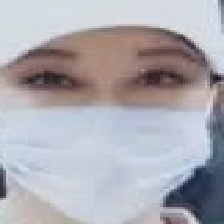

'With_mask'

In [20]:
from IPython.display import display
path=r'/kaggle/input/mask-classification-dataset/dataset/with_mask/1025.jpg'
image=load_img(path,target_size=(224,224))
display(image)
prediction(path)

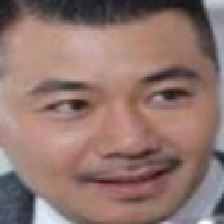

'Without_mask'

In [21]:
path=r'/kaggle/input/mask-classification-dataset/dataset/without_mask/1002.jpg'
image=load_img(path,target_size=(224,224))
display(image)
prediction(path)